# IMPORTED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [40, 20]

#%matplotlib inline
plt.style.use('seaborn-whitegrid')

# READING THE DATA

In [2]:
missing_values = ['0', 'nA', '#NUM!']
training_data = pd.read_csv("data/income-train.csv", na_values=missing_values)
test_data = pd.read_csv("data/income-test.csv", na_values=missing_values)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rename_cols = {"Crime Level in the City of Employement" : "Crime Level",
              "Work Experience in Current Job [years]" : "Work Experience",
              "Body Height [cm]" : "Body Height",
              "Yearly Income in addition to Salary (e.g. Rental Income)" : "Side Income",
              "Total Yearly Income [EUR]" : "Total Income"}

training_data.rename(columns=rename_cols, inplace=True)

In [ ]:
#training_data.head()

# Training Data Pre-processing

## - Dropping Unwanted Rows / Columns

In [4]:
training_data.drop(columns=['Instance'], inplace=True)

In [5]:
training_data.drop_duplicates(inplace=True)

In [6]:
training_data.dropna(subset=['Year of Record'], inplace=True)

In [7]:
# these are the outliers: the rows that don't go well with the graph of 'Year of Record' x 'Total Income' and 'Housing situation' x 'Total Income'
training_data.drop(index=list(training_data[(training_data['Total Income'] > 500000) & (training_data['Total Income'] < 700000) & (training_data['Year of Record'] < 1995)].index), inplace=True)

## - Dealing with NaN values

In [8]:
training_data['Housing Situation'] = training_data['Housing Situation'].fillna(value='shared_place')

In [9]:
training_data['Crime Level'] = training_data['Crime Level'].fillna(value=0)

In [10]:
training_data['Work Experience'] = training_data['Work Experience'].fillna(value='0')

## - Handling of Column Data Types

In [11]:
training_data['Work Experience'] = pd.to_numeric(training_data['Work Experience'])

In [12]:
training_data.dtypes

Year of Record               float64
Housing Situation             object
Crime Level                  float64
Work Experience              float64
Satisfation with employer     object
Gender                        object
Age                            int64
Country                       object
Size of City                   int64
Profession                    object
University Degree             object
Wears Glasses                float64
Hair Color                    object
Body Height                    int64
Side Income                   object
Total Income                 float64
dtype: object

## - Encoding Categorical Features

In [ ]:
#for col in train.dtypes[train.dtypes == 'object'].index.tolist():
#    feat_le = LabelEncoder()
#    feat_le.fit(data[col].unique().astype(str))
#    data[col] = feat_le.transform(data[col].astype(str))

## - Graphs

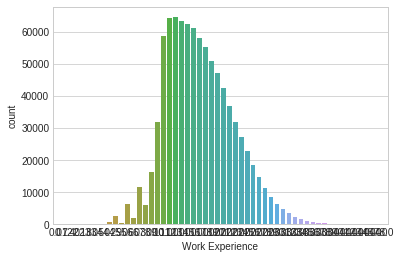

In [14]:
sns.countplot(training_data['Work Experience'])

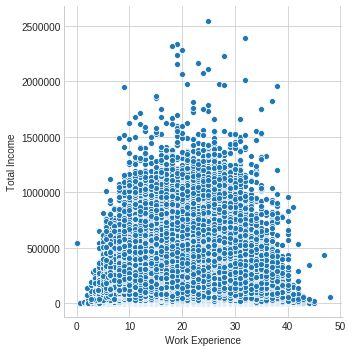

In [16]:
sns.relplot(x="Work Experience", y="Total Income", data=training_data[["Work Experience", "Total Income"]])

In [ ]:
#training_data['Crime Level'].value_counts(dropna=False)

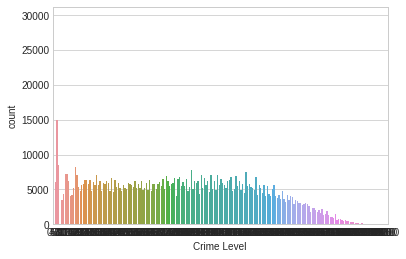

In [17]:
sns.countplot(training_data['Crime Level'])

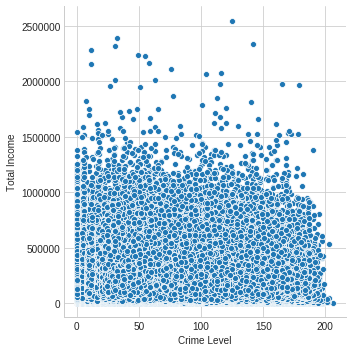

In [18]:
sns.relplot(x="Crime Level", y="Total Income", data=training_data[["Crime Level", "Total Income"]]);

In [ ]:
#training_data['Housing Situation'].value_counts(dropna=False)

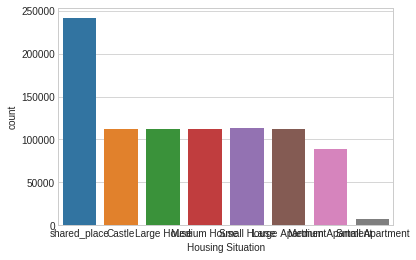

In [19]:
sns.countplot(training_data['Housing Situation'])

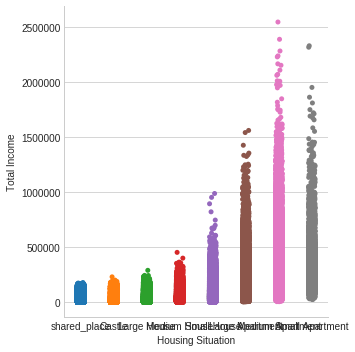

In [20]:
sns.catplot(x="Housing Situation", y="Total Income", data=training_data[["Housing Situation", "Total Income"]])

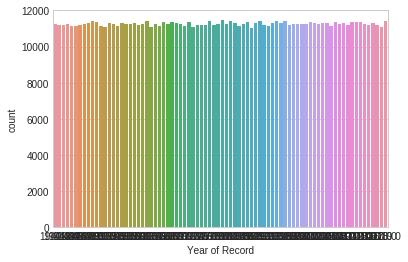

In [21]:
sns.countplot(training_data['Year of Record'])

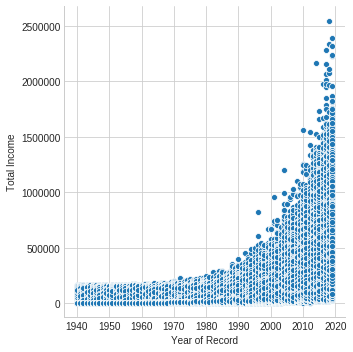

In [22]:
sns.relplot(x="Year of Record", y="Total Income", data=training_data[["Year of Record", "Total Income"]]);

## - Side Work

In [ ]:
sns.countplot(test_data['Housing Situation'])

In [23]:
training_data.corr()

,Year of Record,Crime Level,Work Experience,Age,Size of City,Wears Glasses,Body Height,Total Income
Year of Record,1.000000,-0.000781,0.000123,-0.000183,0.000050,NaN,0.000218,0.643562
Crime Level,-0.000781,1.000000,0.191978,0.197523,0.000098,NaN,-0.000937,-0.026944
Work Experience,0.000123,0.191978,1.000000,0.968826,-0.000541,NaN,0.055529,0.108466
Age,-0.000183,0.197523,0.968826,1.000000,-0.000403,NaN,0.001068,0.103670
Size of City,0.000050,0.000098,-0.000541,-0.000403,1.000000,NaN,-0.001227,0.024540
Wears Glasses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Body Height,0.000218,-0.000937,0.055529,0.001068,-0.001227,NaN,1.000000,0.021192
Total Income,0.643562,-0.026944,0.108466,0.103670,0.024540,NaN,0.021192,1.000000
